# <font color=#004090>LOAN DEFAULT PREDICTION</font>
-----
## Machine Learning Engineer Nanodegree<br>Capstone Project Notebook
Ricardo Szczerbacki <br>
October 2019

This is the work notebook where the data analysis was made.



### Data Analysis


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
# All train application data
application_train = pd.read_csv("data/application_train.csv")

# Train data without rows with any null value column
application_train_nmv = application_train.dropna() 

application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Full train data
print("Total train rows: {}".format(application_train.shape[0]))
is_ok = application_train['TARGET'] == 1
application_train_ok = application_train[is_ok]
ok_percent = (application_train_ok.shape[0] / application_train.shape[0]) * 100
print("Rows tagged as possible default: {} ({:.2f}% of the rows)".format(application_train_ok.shape[0], ok_percent))

# No missing values data
print()
print("Total train rows (without missing values): {}".format(application_train_nmv.shape[0]))
is_ok_nmv = application_train_nmv['TARGET'] == 1
application_train_ok_nmv = application_train_nmv[is_ok]
ok_percent_nmv = (application_train_ok_nmv.shape[0] / application_train_nmv.shape[0]) * 100
print("Rows tagged as possible default: {} ({:.2f}% of the rows)".format(application_train_ok_nmv.shape[0], ok_percent_nmv))


Total train rows: 307511
Rows tagged as possible default: 24825 (8.07% of the rows)

Total train rows (without missing values): 8602
Rows tagged as possible default: 526 (6.11% of the rows)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [4]:
application_train.columns[application_train.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

### Note:
For the Application Training table there are too many rows with missing values, so I will not exclude this rows.<p>
My strategy will be for each column to analyze and take the proper action on missing values, skewed data, categorical data, etc. </p>

In [5]:
processed_app_train = application_train

## TABLE application_train.csv
### SK_ID_CURR
ID of loan in our sample<br>
This column will be removed after the analysis, because it is needed for table merging.

### TARGET
Is the target variable and no treatment is necessary (1 - client with payment difficulties, 0 - all other cases).

### NAME_CONTRACT_TYPE
Identification if loan is cash or revolving. <br>
Categorial.

In [6]:
# Checking for missing values
print("Rows with missing values in NAME_CONTRACT_TYPE: {}".format(
    processed_app_train[processed_app_train.NAME_CONTRACT_TYPE.isnull()].shape[0]))

Rows with missing values in NAME_CONTRACT_TYPE: 0


In [7]:
# List values
print("Values for NAME_CONTRACT_TYPE: ", processed_app_train['NAME_CONTRACT_TYPE'].unique())

Values for NAME_CONTRACT_TYPE:  ['Cash loans' 'Revolving loans']


In [8]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['NAME_CONTRACT_TYPE'], prefix='CTYPE', prefix_sep='_')
processed_app_train = processed_app_train.drop('NAME_CONTRACT_TYPE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### CODE_GENDER
Gender of the client. <br>
Categorial.

In [9]:
# Checking for missing values
print("Rows with missing values in CODE_GENDER: {}".format(
    processed_app_train[processed_app_train.CODE_GENDER.isnull()].shape[0]))

Rows with missing values in CODE_GENDER: 0


In [10]:
# List values
print("Values for CODE_GENDER: ", processed_app_train['CODE_GENDER'].unique())

Values for CODE_GENDER:  ['M' 'F' 'XNA']


In [11]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['CODE_GENDER'], prefix='GEND', prefix_sep='_')
processed_app_train = processed_app_train.drop('CODE_GENDER',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### FLAG_OWN_CAR
Flag if the client owns a car. <br>
Categorial.

In [12]:
# Checking for missing values
print("Rows with missing values in FLAG_OWN_CAR: {}".format(
    processed_app_train[processed_app_train.FLAG_OWN_CAR.isnull()].shape[0]))

Rows with missing values in FLAG_OWN_CAR: 0


In [13]:
# List values
print("Values for FLAG_OWN_CAR: ", processed_app_train['FLAG_OWN_CAR'].unique())

Values for FLAG_OWN_CAR:  ['N' 'Y']


In [14]:
# Value replacing (Y->1 and N->0)
processed_app_train['FLAG_OWN_CAR'] = processed_app_train['FLAG_OWN_CAR'].replace('Y', 1)
processed_app_train['FLAG_OWN_CAR'] = processed_app_train['FLAG_OWN_CAR'].replace('N', 0)

### FLAG_OWN_REALTY
Flag if client owns a house or flat. <br>
Categorial.

In [15]:
# Checking for missing values
print("Rows with missing values in FLAG_OWN_REALTY: {}".format(
    processed_app_train[processed_app_train.FLAG_OWN_REALTY.isnull()].shape[0]))

Rows with missing values in FLAG_OWN_REALTY: 0


In [16]:
# List values
print("Values for FLAG_OWN_REALTY: ", processed_app_train['FLAG_OWN_REALTY'].unique()) 

Values for FLAG_OWN_REALTY:  ['Y' 'N']


In [17]:
# Value replacement (Y->1 and N->0)
processed_app_train['FLAG_OWN_REALTY'] = processed_app_train['FLAG_OWN_REALTY'].replace('Y', 1)
processed_app_train['FLAG_OWN_REALTY'] = processed_app_train['FLAG_OWN_REALTY'].replace('N', 0)

### CNT_CHILDREN
Number of children the client has.

In [18]:
# Checking for missing values
print("Rows with missing values in CNT_CHILDREN: {}".format(
    processed_app_train[processed_app_train.CNT_CHILDREN.isnull()].shape[0]))

Rows with missing values in CNT_CHILDREN: 0


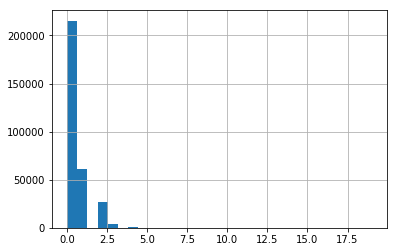

In [19]:
# Check the data distribution
processed_app_train['CNT_CHILDREN'].hist(bins=30)

In [20]:
# Feature scaling (min-max normalization)
processed_app_train['CNT_CHILDREN'] = ((processed_app_train['CNT_CHILDREN'] -
                                        processed_app_train['CNT_CHILDREN'].min())/
                                       (processed_app_train['CNT_CHILDREN'].max() - 
                                        processed_app_train['CNT_CHILDREN'].min()))

### AMT_INCOME_TOTAL
Income of the client.

In [21]:
# Checking for missing values
print("Rows with missing values in AMT_INCOME_TOTAL: {}".format(
    processed_app_train[processed_app_train.AMT_INCOME_TOTAL.isnull()].shape[0]))

Rows with missing values in AMT_INCOME_TOTAL: 0


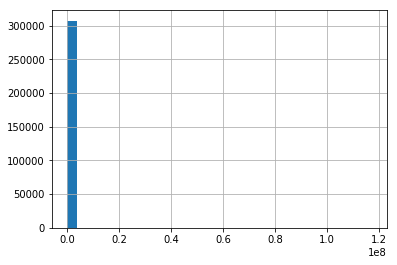

In [22]:
# Check the data distribution
processed_app_train['AMT_INCOME_TOTAL'].hist(bins=30)

In [23]:
# Data seems to be skewed
print("Skewness: {}".format(processed_app_train['AMT_INCOME_TOTAL'].skew()))

Skewness: 391.5596541041876


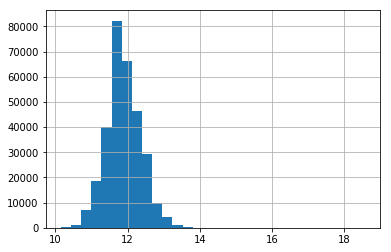

In [24]:
# Data skewed: try to apply log
processed_app_train['AMT_INCOME_TOTAL'].apply(np.log).hist(bins=30)

In [25]:
# Apply log
processed_app_train['AMT_INCOME_TOTAL'] = np.log(processed_app_train.AMT_INCOME_TOTAL)

In [26]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_INCOME_TOTAL'] = ((processed_app_train['AMT_INCOME_TOTAL'] -
                                            processed_app_train['AMT_INCOME_TOTAL'].min())/
                                           (processed_app_train['AMT_INCOME_TOTAL'].max() - 
                                            processed_app_train['AMT_INCOME_TOTAL'].min()))

In [27]:
processed_app_train['AMT_INCOME_TOTAL'] = processed_app_train['AMT_INCOME_TOTAL'].replace(0, 0.0001)

### AMT_CREDIT
Credit amount of the loan.

In [28]:
# Checking for missing values
print("Rows with missing values in AMT_CREDIT: {}".format(
    processed_app_train[processed_app_train.AMT_CREDIT.isnull()].shape[0]))

Rows with missing values in AMT_CREDIT: 0


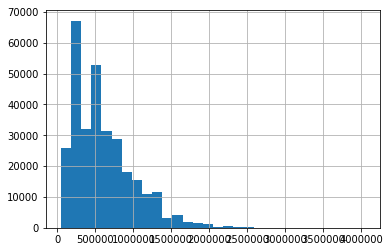

In [29]:
# Check the data distribution
processed_app_train['AMT_CREDIT'].hist(bins=30)

In [30]:
# Data seems to be skewed
print("Skewness: {}".format(processed_app_train['AMT_CREDIT'].skew()))

Skewness: 1.2347784971349398


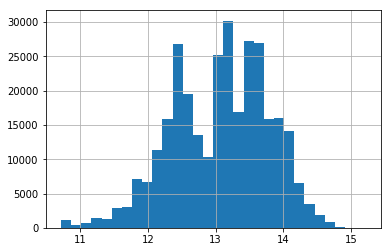

In [31]:
# Data skewed: try to apply log
processed_app_train['AMT_CREDIT'].apply(np.log).hist(bins=30)

In [32]:
# Apply log
processed_app_train['AMT_CREDIT'] = np.log(processed_app_train.AMT_CREDIT)

In [33]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_CREDIT'] = ((processed_app_train['AMT_CREDIT'] -
                                      processed_app_train['AMT_CREDIT'].min())/
                                     (processed_app_train['AMT_CREDIT'].max() - 
                                      processed_app_train['AMT_CREDIT'].min()))

### AMT_ANNUITY
Loan annuity.

In [34]:
# Checking for missing values
print("Rows with missing values in AMT_ANNUITY: {}".format(
    processed_app_train[processed_app_train.AMT_ANNUITY.isnull()].shape[0]))

Rows with missing values in AMT_ANNUITY: 12


In [35]:
# Few rows with nulls -> delete rows
processed_app_train = processed_app_train[processed_app_train.AMT_ANNUITY.notnull()]

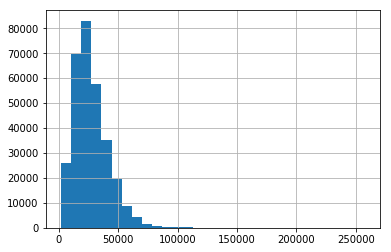

In [36]:
# Check the data distribution
processed_app_train['AMT_ANNUITY'].hist(bins=30)

In [37]:
# Data seems to be skewed
print("Skewness: {}".format(processed_app_train['AMT_ANNUITY'].skew()))

Skewness: 1.5797773638612504


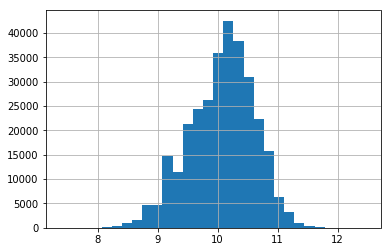

In [38]:
# Data skewed: try to apply log
processed_app_train['AMT_ANNUITY'].apply(np.log).hist(bins=30)

In [39]:
# Apply log
processed_app_train['AMT_ANNUITY'] = np.log(processed_app_train.AMT_ANNUITY)

In [40]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_ANNUITY'] = ((processed_app_train['AMT_ANNUITY'] -
                                      processed_app_train['AMT_ANNUITY'].min())/
                                     (processed_app_train['AMT_ANNUITY'].max() - 
                                      processed_app_train['AMT_ANNUITY'].min()))

### AMT_GOODS_PRICE
For consumer loans it is the price of the goods for which the loan is given.

In [41]:
# Checking for missing values
print("Rows with missing values in AMT_GOODS_PRICE: {}".format(
    processed_app_train[processed_app_train.AMT_GOODS_PRICE.isnull()].shape[0]))


Rows with missing values in AMT_GOODS_PRICE: 278


In [42]:
# Few rows with nulls -> delete rows
processed_app_train = processed_app_train[processed_app_train.AMT_GOODS_PRICE.notnull()]

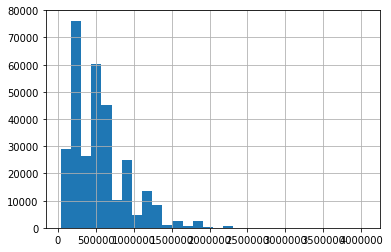

In [43]:
# Check the data distribution
processed_app_train['AMT_GOODS_PRICE'].hist(bins=30)

In [44]:
# Data seems to be skewed
print("Skewness: {}".format(processed_app_train['AMT_GOODS_PRICE'].skew()))

Skewness: 1.3489957352316093


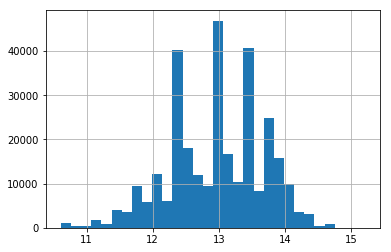

In [45]:
# Data skewed: try to apply log
processed_app_train['AMT_GOODS_PRICE'].apply(np.log).hist(bins=30)

In [46]:
# Apply log
processed_app_train['AMT_GOODS_PRICE'] = np.log(processed_app_train.AMT_GOODS_PRICE)

In [47]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_GOODS_PRICE'] = ((processed_app_train['AMT_GOODS_PRICE'] -
                                      processed_app_train['AMT_GOODS_PRICE'].min())/
                                     (processed_app_train['AMT_GOODS_PRICE'].max() - 
                                      processed_app_train['AMT_GOODS_PRICE'].min()))



### NAME_TYPE_SUITE
Who was accompanying client when he was applying for the loan. <br>
Categorical.

In [48]:
# Checking for missing values
print("Rows with missing values in NAME_TYPE_SUITE: {}".format(
    processed_app_train[processed_app_train.NAME_TYPE_SUITE.isnull()].shape[0]))

Rows with missing values in NAME_TYPE_SUITE: 1014


In [49]:
# List values
print("Values for NAME_TYPE_SUITE: ", processed_app_train['NAME_TYPE_SUITE'].unique())

Values for NAME_TYPE_SUITE:  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']


In [50]:
# Preparing data for One Hot Encoding
processed_app_train['NAME_TYPE_SUITE'].fillna(value='Other', inplace=True)

In [51]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['NAME_TYPE_SUITE'], prefix='NTS', prefix_sep='_')
processed_app_train = processed_app_train.drop('NAME_TYPE_SUITE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### NAME_INCOME_TYPE
Clients income type (businessman, working, maternity leave,…).<br>
Categorical.

In [52]:
# Checking for missing values
print("Rows with missing values in NAME_INCOME_TYPE: {}".format(
    processed_app_train[processed_app_train.NAME_INCOME_TYPE.isnull()].shape[0]))

Rows with missing values in NAME_INCOME_TYPE: 0


In [53]:
# List values
print("Values for NAME_INCOME_TYPE: ", processed_app_train['NAME_INCOME_TYPE'].unique())


Values for NAME_INCOME_TYPE:  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


In [54]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['NAME_INCOME_TYPE'], prefix='INCTYP', prefix_sep='_')
processed_app_train = processed_app_train.drop('NAME_INCOME_TYPE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### NAME_EDUCATION_TYPE
Level of highest education the client achieved. <br>
Categorical.

In [55]:
# Checking for missing values
print("Rows with missing values in NAME_EDUCATION_TYPE: {}".format(
    processed_app_train[processed_app_train.NAME_EDUCATION_TYPE.isnull()].shape[0]))

Rows with missing values in NAME_EDUCATION_TYPE: 0


In [56]:
# List values
print("Values for NAME_EDUCATION_TYPE: ", processed_app_train['NAME_EDUCATION_TYPE'].unique())

Values for NAME_EDUCATION_TYPE:  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [57]:
# Preparing data for One Hot Encoding
processed_app_train['NAME_EDUCATION_TYPE'] = processed_app_train['NAME_EDUCATION_TYPE'].replace(
    'Secondary / secondary special', 'Secondary special')

In [58]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['NAME_EDUCATION_TYPE'], prefix='EDU', prefix_sep='_')
processed_app_train = processed_app_train.drop('NAME_EDUCATION_TYPE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### NAME_FAMILY_STATUS
Family status of the client. <br>
Categorical.

In [59]:
# Checking for missing values
print("Rows with missing values in NAME_FAMILY_STATUS: {}".format(
    processed_app_train[processed_app_train.NAME_FAMILY_STATUS.isnull()].shape[0]))

Rows with missing values in NAME_FAMILY_STATUS: 0


In [60]:
# List values
print("Values for NAME_FAMILY_STATUS: ", processed_app_train['NAME_FAMILY_STATUS'].unique())

Values for NAME_FAMILY_STATUS:  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']


In [61]:
# Preparing data for One Hot Encoding
processed_app_train['NAME_FAMILY_STATUS'] = processed_app_train['NAME_FAMILY_STATUS'].replace(
    'Single / not married', 'Single')

In [62]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['NAME_FAMILY_STATUS'], prefix='FAM', prefix_sep='_')
processed_app_train = processed_app_train.drop('NAME_FAMILY_STATUS',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### NAME_HOUSING_TYPE
What is the housing situation of the client (renting, living with parents, ...). <br>
Categorical.

In [63]:
# Checking for missing values
print("Rows with missing values in NAME_HOUSING_TYPE: {}".format(
    processed_app_train[processed_app_train.NAME_HOUSING_TYPE.isnull()].shape[0]))

Rows with missing values in NAME_HOUSING_TYPE: 0


In [64]:
# List values
print("Values for NAME_HOUSING_TYPE: ", processed_app_train['NAME_HOUSING_TYPE'].unique())

Values for NAME_HOUSING_TYPE:  ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [65]:
# Preparing data for One Hot Encoding
processed_app_train['NAME_HOUSING_TYPE'] = processed_app_train['NAME_HOUSING_TYPE'].replace(
    'House / apartment', 'House')

In [66]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['NAME_HOUSING_TYPE'], prefix='HOUST', prefix_sep='_')
processed_app_train = processed_app_train.drop('NAME_HOUSING_TYPE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### REGION_POPULATION_RELATIVE
Normalized population of region where client lives (higher number means the client lives in more populated region).


In [67]:
# Checking for missing values
print("Rows with missing values in REGION_POPULATION_RELATIVE: {}".format(
    processed_app_train[processed_app_train.REGION_POPULATION_RELATIVE.isnull()].shape[0]))

Rows with missing values in REGION_POPULATION_RELATIVE: 0


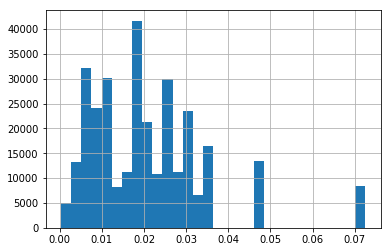

In [68]:
# Check the data distribution
processed_app_train['REGION_POPULATION_RELATIVE'].hist(bins=30)

In [69]:
# Feature scaling (min-max normalization)
processed_app_train['REGION_POPULATION_RELATIVE'] = ((processed_app_train['REGION_POPULATION_RELATIVE'] -
                                      processed_app_train['REGION_POPULATION_RELATIVE'].min())/
                                     (processed_app_train['REGION_POPULATION_RELATIVE'].max() - 
                                      processed_app_train['REGION_POPULATION_RELATIVE'].min()))

### DAYS_BIRTH
Client's age in days at the time of application.

In [70]:
# Checking for missing values
print("Rows with missing values in DAYS_BIRTH: {}".format(
    processed_app_train[processed_app_train.DAYS_BIRTH.isnull()].shape[0]))

Rows with missing values in DAYS_BIRTH: 0


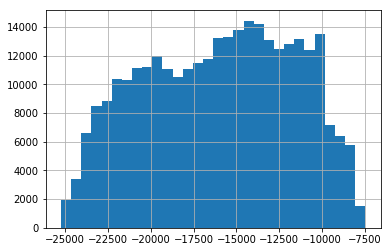

In [71]:
# Check the data distribution
processed_app_train['DAYS_BIRTH'].hist(bins=30)

In [72]:
# Feature scaling (min-max normalization)
processed_app_train['DAYS_BIRTH'] = ((processed_app_train['DAYS_BIRTH'] -
                                      processed_app_train['DAYS_BIRTH'].min())/
                                     (processed_app_train['DAYS_BIRTH'].max() - 
                                      processed_app_train['DAYS_BIRTH'].min()))

### DAYS_EMPLOYED
How many days before the application the person started current employment.

In [73]:
# Checking for missing values
print("Rows with missing values in DAYS_EMPLOYED: {}".format(
    processed_app_train[processed_app_train.DAYS_EMPLOYED.isnull()].shape[0]))

Rows with missing values in DAYS_EMPLOYED: 0


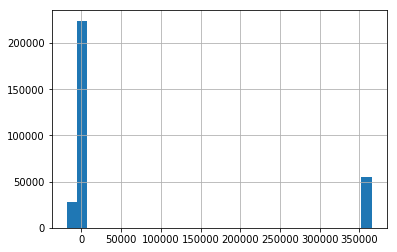

In [74]:
# Check the data distribution
processed_app_train['DAYS_EMPLOYED'].hist(bins=30)

In [75]:
# Feature scaling (min-max normalization)
processed_app_train['DAYS_EMPLOYED'] = ((processed_app_train['DAYS_EMPLOYED'] -
                                      processed_app_train['DAYS_EMPLOYED'].min())/
                                     (processed_app_train['DAYS_EMPLOYED'].max() - 
                                      processed_app_train['DAYS_EMPLOYED'].min()))


### DAYS_REGISTRATION
How many days before the application did client change his registration.

In [76]:
# Checking for missing values
print("Rows with missing values in DAYS_REGISTRATION: {}".format(
    processed_app_train[processed_app_train.DAYS_REGISTRATION.isnull()].shape[0]))

Rows with missing values in DAYS_REGISTRATION: 0


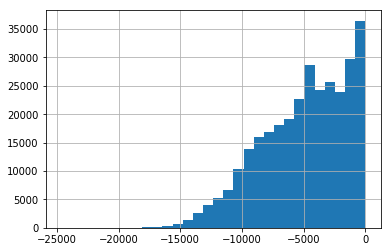

In [77]:
# Check the data distribution
processed_app_train['DAYS_REGISTRATION'].hist(bins=30)

In [78]:
# Feature scaling (min-max normalization)
processed_app_train['DAYS_REGISTRATION'] = ((processed_app_train['DAYS_REGISTRATION'] -
                                      processed_app_train['DAYS_REGISTRATION'].min())/
                                     (processed_app_train['DAYS_REGISTRATION'].max() - 
                                      processed_app_train['DAYS_REGISTRATION'].min()))


### DAYS_ID_PUBLISH
How many days before the application did client change the identity document with which he applied for the loan.

In [79]:
# Checking for missing values
print("Rows with missing values in DAYS_ID_PUBLISH: {}".format(
    processed_app_train[processed_app_train.DAYS_ID_PUBLISH.isnull()].shape[0]))

Rows with missing values in DAYS_ID_PUBLISH: 0


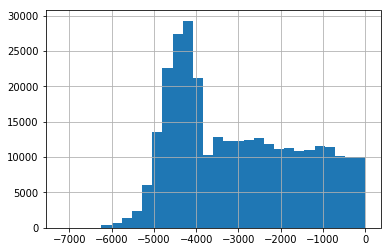

In [80]:
# Check the data distribution
processed_app_train['DAYS_ID_PUBLISH'].hist(bins=30)

In [81]:
# Feature scaling (min-max normalization)
processed_app_train['DAYS_ID_PUBLISH'] = ((processed_app_train['DAYS_ID_PUBLISH'] -
                                      processed_app_train['DAYS_ID_PUBLISH'].min())/
                                     (processed_app_train['DAYS_ID_PUBLISH'].max() - 
                                      processed_app_train['DAYS_ID_PUBLISH'].min()))

### OWN_CAR_AGE
Age of client's car.

In [82]:
# Checking for missing values
print("Rows with missing values in OWN_CAR_AGE: {}".format(
    processed_app_train[processed_app_train.OWN_CAR_AGE.isnull()].shape[0]))

Rows with missing values in OWN_CAR_AGE: 202642


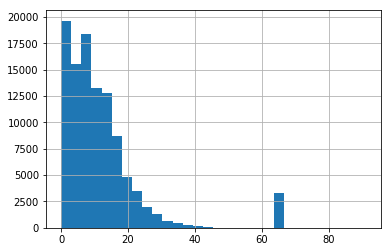

In [83]:
# Check the data distribution
processed_app_train['OWN_CAR_AGE'].hist(bins=30)

The spike for cars above 60 years may be related to antiques. But after a certain age it is difficult to know if we are talking about an antique (expensive car) or just a really old one (very inexpensive). Cars above 40 years may be considered an antique. So, let's see how many cars are in this class:

In [84]:
print("Applicants with car with more then 40 years: {}".format(
    processed_app_train[processed_app_train['OWN_CAR_AGE'] > 40].shape[0]))

Applicants with car with more then 40 years: 3526


In [85]:
# delete rows with cars above 40 years
processed_app_train.drop(processed_app_train[processed_app_train['OWN_CAR_AGE'] > 40].index , inplace=True)

In [86]:
# I will fill the missing values of the age with the mean value of the remaing ages
processed_app_train['OWN_CAR_AGE'].fillna(value=processed_app_train['OWN_CAR_AGE'].mean(), inplace=True)

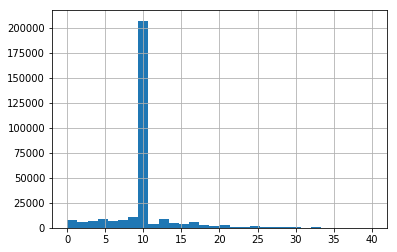

In [87]:
# Check the data distribution
processed_app_train['OWN_CAR_AGE'].hist(bins=30)

In [88]:
# Feature scaling (min-max normalization)
processed_app_train['OWN_CAR_AGE'] = ((processed_app_train['OWN_CAR_AGE'] -
                                      processed_app_train['OWN_CAR_AGE'].min())/
                                     (processed_app_train['OWN_CAR_AGE'].max() - 
                                      processed_app_train['OWN_CAR_AGE'].min()))

### FLAG_MOBIL
Did client provide mobile phone (1=YES, 0=NO).

In [89]:
# Checking for missing values
print("Rows with missing values in FLAG_MOBIL: {}".format(
    processed_app_train[processed_app_train.FLAG_MOBIL.isnull()].shape[0]))

Rows with missing values in FLAG_MOBIL: 0


### FLAG_EMP_PHONE
Did client provide work phone (1=YES, 0=NO).

In [90]:
# Checking for missing values
print("Rows with missing values in FLAG_EMP_PHONE: {}".format(
    processed_app_train[processed_app_train.FLAG_EMP_PHONE.isnull()].shape[0]))

Rows with missing values in FLAG_EMP_PHONE: 0


### FLAG_WORK_PHONE
Did client provide home phone (1=YES, 0=NO).

In [91]:
# Checking for missing values
print("Rows with missing values in FLAG_WORK_PHONE: {}".format(
    processed_app_train[processed_app_train.FLAG_WORK_PHONE.isnull()].shape[0]))

Rows with missing values in FLAG_WORK_PHONE: 0


### FLAG_CONT_MOBILE
Was mobile phone reachable (1=YES, 0=NO).

In [92]:
# Checking for missing values
print("Rows with missing values in FLAG_CONT_MOBILE: {}".format(
    processed_app_train[processed_app_train.FLAG_CONT_MOBILE.isnull()].shape[0]))

Rows with missing values in FLAG_CONT_MOBILE: 0


### FLAG_PHONE
Did client provide home phone (1=YES, 0=NO).

In [93]:
# Checking for missing values
print("Rows with missing values in FLAG_PHONE: {}".format(
    processed_app_train[processed_app_train.FLAG_PHONE.isnull()].shape[0]))

Rows with missing values in FLAG_PHONE: 0


### FLAG_EMAIL
Did client provide email (1=YES, 0=NO).

In [94]:
# Checking for missing values
print("Rows with missing values in FLAG_EMAIL: {}".format(
    processed_app_train[processed_app_train.FLAG_EMAIL.isnull()].shape[0]))

Rows with missing values in FLAG_EMAIL: 0


### OCCUPATION_TYPE
What kind of occupation does the client have.
Categorical.

In [95]:
# Checking for missing values
print("Rows with missing values in OCCUPATION_TYPE: {}".format(
    processed_app_train[processed_app_train.OCCUPATION_TYPE.isnull()].shape[0]))

Rows with missing values in OCCUPATION_TYPE: 95529


In [96]:
# List values
print("Values for OCCUPATION_TYPE: ", processed_app_train['OCCUPATION_TYPE'].unique())

Values for OCCUPATION_TYPE:  ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


In [97]:
# Preparing data for One Hot Encoding
processed_app_train['OCCUPATION_TYPE'].fillna(value='None', inplace=True)
processed_app_train['OCCUPATION_TYPE'] = processed_app_train['OCCUPATION_TYPE'].replace(
    'Waiters/barmen staff', 'WaitersBarmen')

In [98]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['OCCUPATION_TYPE'], prefix='OCCT', prefix_sep='_')
processed_app_train = processed_app_train.drop('OCCUPATION_TYPE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### CNT_FAM_MEMBERS
How many family members does client have.

In [99]:
# Checking for missing values
print("Rows with missing values in CNT_FAM_MEMBERS: {}".format(
    processed_app_train[processed_app_train.CNT_FAM_MEMBERS.isnull()].shape[0]))

Rows with missing values in CNT_FAM_MEMBERS: 0


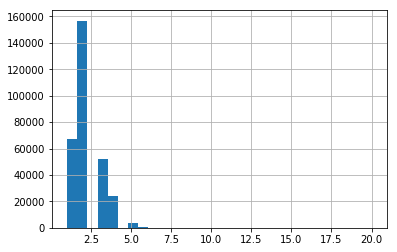

In [100]:
# Check the data distribution
processed_app_train['CNT_FAM_MEMBERS'].hist(bins=30)

In [101]:
# Feature scaling (min-max normalization)
processed_app_train['CNT_FAM_MEMBERS'] = ((processed_app_train['CNT_FAM_MEMBERS'] -
                                      processed_app_train['CNT_FAM_MEMBERS'].min())/
                                     (processed_app_train['CNT_FAM_MEMBERS'].max() - 
                                      processed_app_train['CNT_FAM_MEMBERS'].min()))

### REGION_RATING_CLIENT
Our rating of the region where client lives (1,2,3). <br>
Will be treated as categorical.

In [102]:
# Checking for missing values
print("Rows with missing values in REGION_RATING_CLIENT: {}".format(
    processed_app_train[processed_app_train.REGION_RATING_CLIENT.isnull()].shape[0]))

Rows with missing values in REGION_RATING_CLIENT: 0


In [103]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['REGION_RATING_CLIENT'], prefix='REGION', prefix_sep='_')
processed_app_train = processed_app_train.drop('REGION_RATING_CLIENT',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### REGION_RATING_CLIENT_W_CITY
Our rating of the region where client lives with taking city into account (1,2,3). <br>
Will be treated as categorical.

In [104]:
# Checking for missing values
print("Rows with missing values in REGION_RATING_CLIENT_W_CITY: {}".format(
    processed_app_train[processed_app_train.REGION_RATING_CLIENT_W_CITY.isnull()].shape[0]))

Rows with missing values in REGION_RATING_CLIENT_W_CITY: 0


In [105]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['REGION_RATING_CLIENT_W_CITY'], 
                                  prefix='REGIONCTY', prefix_sep='_')
processed_app_train = processed_app_train.drop('REGION_RATING_CLIENT_W_CITY',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### WEEKDAY_APPR_PROCESS_START
On which day of the week did the client apply for the loan. <br>
Categorical.

In [106]:
# Checking for missing values
print("Rows with missing values in WEEKDAY_APPR_PROCESS_START: {}".format(
    processed_app_train[processed_app_train.WEEKDAY_APPR_PROCESS_START.isnull()].shape[0]))

Rows with missing values in WEEKDAY_APPR_PROCESS_START: 0


In [107]:
# List values
print("Values for WEEKDAY_APPR_PROCESS_START: ", processed_app_train['WEEKDAY_APPR_PROCESS_START'].unique())

Values for WEEKDAY_APPR_PROCESS_START:  ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']


In [108]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['WEEKDAY_APPR_PROCESS_START'], prefix='WD', prefix_sep='_')
processed_app_train = processed_app_train.drop('WEEKDAY_APPR_PROCESS_START',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### HOUR_APPR_PROCESS_START
Approximately at what hour did the client apply for the loan.

In [109]:
# Checking for missing values
print("Rows with missing values in HOUR_APPR_PROCESS_START: {}".format(
    processed_app_train[processed_app_train.HOUR_APPR_PROCESS_START.isnull()].shape[0]))

Rows with missing values in HOUR_APPR_PROCESS_START: 0


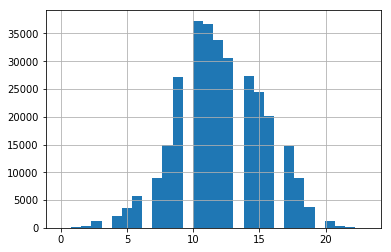

In [110]:
# Check the data distribution
processed_app_train['HOUR_APPR_PROCESS_START'].hist(bins=30)

In [111]:
# Feature scaling (min-max normalization)
processed_app_train['HOUR_APPR_PROCESS_START'] = ((processed_app_train['HOUR_APPR_PROCESS_START'] -
                                      processed_app_train['HOUR_APPR_PROCESS_START'].min())/
                                     (processed_app_train['HOUR_APPR_PROCESS_START'].max() - 
                                      processed_app_train['HOUR_APPR_PROCESS_START'].min()))

### REG_REGION_NOT_LIVE_REGION
Flag if client's permanent address does not match contact address (1=different, 0=same, at region level).

In [112]:
# Checking for missing values
print("Rows with missing values in REG_REGION_NOT_LIVE_REGION: {}".format(
    processed_app_train[processed_app_train.REG_REGION_NOT_LIVE_REGION.isnull()].shape[0]))

Rows with missing values in REG_REGION_NOT_LIVE_REGION: 0


### REG_REGION_NOT_WORK_REGION
Flag if client's permanent address does not match work address (1=different, 0=same, at region level).

In [113]:
# Checking for missing values
print("Rows with missing values in REG_REGION_NOT_WORK_REGION: {}".format(
    processed_app_train[processed_app_train.REG_REGION_NOT_WORK_REGION.isnull()].shape[0]))

Rows with missing values in REG_REGION_NOT_WORK_REGION: 0


### LIVE_REGION_NOT_WORK_REGION
Flag if client's contact address does not match work address (1=different, 0=same, at region level).

In [114]:
# Checking for missing values
print("Rows with missing values in LIVE_REGION_NOT_WORK_REGION: {}".format(
    processed_app_train[processed_app_train.LIVE_REGION_NOT_WORK_REGION.isnull()].shape[0]))

Rows with missing values in LIVE_REGION_NOT_WORK_REGION: 0


### REG_CITY_NOT_LIVE_CITY
Flag if client's permanent address does not match contact address (1=different, 0=same, at city level).

In [115]:
# Checking for missing values
print("Rows with missing values in REG_CITY_NOT_LIVE_CITY: {}".format(
    processed_app_train[processed_app_train.REG_CITY_NOT_LIVE_CITY.isnull()].shape[0]))

Rows with missing values in REG_CITY_NOT_LIVE_CITY: 0


### REG_CITY_NOT_WORK_CITY
Flag if client's permanent address does not match work address (1=different, 0=same, at city level).

In [116]:
# Checking for missing values
print("Rows with missing values in REG_CITY_NOT_WORK_CITY: {}".format(
    processed_app_train[processed_app_train.REG_CITY_NOT_WORK_CITY.isnull()].shape[0]))

Rows with missing values in REG_CITY_NOT_WORK_CITY: 0


### LIVE_CITY_NOT_WORK_CITY
Flag if client's contact address does not match work address (1=different, 0=same, at city level).

In [117]:
# Checking for missing values
print("Rows with missing values in LIVE_CITY_NOT_WORK_CITY: {}".format(
    processed_app_train[processed_app_train.LIVE_CITY_NOT_WORK_CITY.isnull()].shape[0]))

Rows with missing values in LIVE_CITY_NOT_WORK_CITY: 0


### ORGANIZATION_TYPE
Type of organization where client works. <br>
Categorical.

In [118]:
# Checking for missing values
print("Rows with missing values in ORGANIZATION_TYPE: {}".format(
    processed_app_train[processed_app_train.ORGANIZATION_TYPE.isnull()].shape[0]))

Rows with missing values in ORGANIZATION_TYPE: 0


In [119]:
# List values
print("Values for ORGANIZATION_TYPE: ", processed_app_train['ORGANIZATION_TYPE'].unique())

Values for ORGANIZATION_TYPE:  ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6']


In [120]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['ORGANIZATION_TYPE'], prefix='ORGT', prefix_sep='_')
processed_app_train = processed_app_train.drop('ORGANIZATION_TYPE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### EXT_SOURCE_1
Normalized score from external data source.

In [121]:
# Checking for missing values
print("Rows with missing values in EXT_SOURCE_1: {}".format(
    processed_app_train[processed_app_train.EXT_SOURCE_1.isnull()].shape[0]))

Rows with missing values in EXT_SOURCE_1: 171450


In [122]:
# Fill the missing values with the mean value
processed_app_train['EXT_SOURCE_1'].fillna(value=processed_app_train['EXT_SOURCE_1'].mean(), inplace=True)

### EXT_SOURCE_2
Normalized score from external data source.

In [123]:
# Checking for missing values
print("Rows with missing values in EXT_SOURCE_2: {}".format(
    processed_app_train[processed_app_train.EXT_SOURCE_2.isnull()].shape[0]))

Rows with missing values in EXT_SOURCE_2: 649


In [124]:
# Few rows with nulls -> delete rows
processed_app_train = processed_app_train[processed_app_train.EXT_SOURCE_2.notnull()]

### EXT_SOURCE_3
Normalized score from external data source.

In [125]:
# Checking for missing values
print("Rows with missing values in EXT_SOURCE_3: {}".format(
    processed_app_train[processed_app_train.EXT_SOURCE_3.isnull()].shape[0]))

Rows with missing values in EXT_SOURCE_3: 60149


In [126]:
# Fill the missing values with the mean value
processed_app_train['EXT_SOURCE_3'].fillna(value=processed_app_train['EXT_SOURCE_3'].mean(), inplace=True)

In [127]:
processed_app_train.shape[0]

303046

### FONDKAPREMONT_MODE
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor.<br>
Categorial.

In [128]:
# Checking for missing values
print("Rows with missing values in FONDKAPREMONT_MODE: {}".format(
    processed_app_train[processed_app_train.FONDKAPREMONT_MODE.isnull()].shape[0]))

Rows with missing values in FONDKAPREMONT_MODE: 207311


In [129]:
# List values
print("Values for FONDKAPREMONT_MODE: ", processed_app_train['FONDKAPREMONT_MODE'].unique())

Values for FONDKAPREMONT_MODE:  ['reg oper account' nan 'org spec account' 'reg oper spec account'
 'not specified']


In [130]:
processed_app_train['FONDKAPREMONT_MODE'].fillna(value='Unspec', inplace=True)

In [131]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['FONDKAPREMONT_MODE'], prefix='FONDKA', prefix_sep='_')
processed_app_train = processed_app_train.drop('FONDKAPREMONT_MODE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### HOUSETYPE_MODE
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor.<br>
Categorical.

In [132]:
# Checking for missing values
print("Rows with missing values in HOUSETYPE_MODE: {}".format(
    processed_app_train[processed_app_train.HOUSETYPE_MODE.isnull()].shape[0]))

Rows with missing values in HOUSETYPE_MODE: 152135


In [133]:
# List values
print("Values for HOUSETYPE_MODE: ", processed_app_train['HOUSETYPE_MODE'].unique())

Values for HOUSETYPE_MODE:  ['block of flats' nan 'terraced house' 'specific housing']


In [134]:
# Preparing data for One Hot Encoding
processed_app_train['HOUSETYPE_MODE'].fillna(value='Unspec', inplace=True)

In [135]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['HOUSETYPE_MODE'], prefix='HTM', prefix_sep='_')
processed_app_train = processed_app_train.drop('HOUSETYPE_MODE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### WALLSMATERIAL_MODE
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor. <br>
Categorical.

In [136]:
# Checking for missing values
print("Rows with missing values in WALLSMATERIAL_MODE: {}".format(
    processed_app_train[processed_app_train.WALLSMATERIAL_MODE.isnull()].shape[0]))

Rows with missing values in WALLSMATERIAL_MODE: 154156


In [137]:
# Preparing data for One Hot Encoding
processed_app_train['WALLSMATERIAL_MODE'].fillna(value='Unspec', inplace=True)

In [138]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['WALLSMATERIAL_MODE'], prefix='WMOD', prefix_sep='_')
processed_app_train = processed_app_train.drop('WALLSMATERIAL_MODE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### EMERGENCYSTATE_MODE
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor.<br>
Categorical.

In [139]:
# Checking for missing values
print("Rows with missing values in EMERGENCYSTATE_MODE: {}".format(
    processed_app_train[processed_app_train.EMERGENCYSTATE_MODE.isnull()].shape[0]))

Rows with missing values in EMERGENCYSTATE_MODE: 143699


In [140]:
# List values
print("Values for EMERGENCYSTATE_MODE: ", processed_app_train['EMERGENCYSTATE_MODE'].unique())

Values for EMERGENCYSTATE_MODE:  ['No' nan 'Yes']


In [141]:
# Preparing data for One Hot Encoding
processed_app_train['EMERGENCYSTATE_MODE'].fillna(value='Unspec', inplace=True)

In [142]:
# One hot encoding
one_hot_encoding = pd.get_dummies(processed_app_train['EMERGENCYSTATE_MODE'], prefix='EMGMODE', prefix_sep='_')
processed_app_train = processed_app_train.drop('EMERGENCYSTATE_MODE',axis = 1)
processed_app_train = pd.concat([processed_app_train, one_hot_encoding], axis=1)
processed_app_train.columns = processed_app_train.columns.str.strip().str.upper().str.replace(' ', '_')

### OBS_30_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings with observable 30 DPD (days past due) default.

In [143]:
# Checking for missing values
print("Rows with missing values in OBS_30_CNT_SOCIAL_CIRCLE: {}".format(
    processed_app_train[processed_app_train.OBS_30_CNT_SOCIAL_CIRCLE.isnull()].shape[0]))

Rows with missing values in OBS_30_CNT_SOCIAL_CIRCLE: 992


In [144]:
# Few rows with nulls -> delete rows
processed_app_train = processed_app_train[processed_app_train.OBS_30_CNT_SOCIAL_CIRCLE.notnull()]

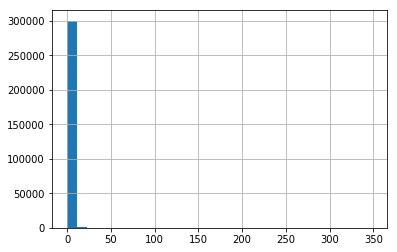

In [145]:
# Check the data distribution
processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].hist(bins=30)

In [146]:
# Data seems to be skewed
print("Skewness: {}".format(processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].skew()))

Skewness: 12.271381467680962


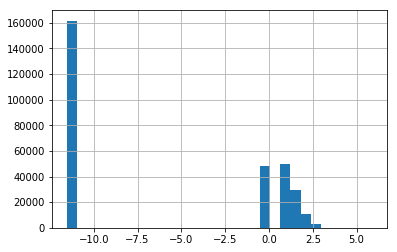

In [147]:
# Data skewed: try to apply log
processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].replace(0,0.00001).apply(np.log).hist(bins=30)

In [148]:
# Apply log
processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'] = processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].replace(0,0.00001)
processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'] = np.log(processed_app_train.OBS_30_CNT_SOCIAL_CIRCLE)

In [149]:
# Feature scaling (min-max normalization)
processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'] = ((processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'] -
                                      processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].min())/
                                     (processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].max() - 
                                      processed_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].min()))

### DEF_30_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings defaulted on 30 DPD (days past due).

In [150]:
# Checking for missing values
print("Rows with missing values in DEF_30_CNT_SOCIAL_CIRCLE: {}".format(
    processed_app_train[processed_app_train.DEF_30_CNT_SOCIAL_CIRCLE.isnull()].shape[0]))

Rows with missing values in DEF_30_CNT_SOCIAL_CIRCLE: 0


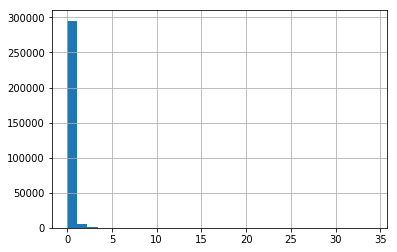

In [151]:
# Check the data distribution
processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].hist(bins=30)

In [152]:
# Data seems to be skewed
print("Skewness: {}".format(processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].skew()))

Skewness: 5.201264871756483


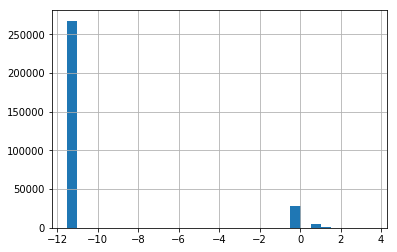

In [153]:
# Data skewed: try to apply log
processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].replace(0,0.00001).apply(np.log).hist(bins=30)

In [154]:
# Apply log
processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'] = processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].replace(0,0.00001)
processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'] = np.log(processed_app_train.DEF_30_CNT_SOCIAL_CIRCLE)

In [155]:
# Feature scaling (min-max normalization)
processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'] = ((processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'] -
                                      processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].min())/
                                     (processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].max() - 
                                      processed_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].min()))

### OBS_60_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings with observable 60 DPD (days past due) default.

In [156]:
# Checking for missing values
print("Rows with missing values in OBS_60_CNT_SOCIAL_CIRCLE: {}".format(
    processed_app_train[processed_app_train.OBS_60_CNT_SOCIAL_CIRCLE.isnull()].shape[0]))

Rows with missing values in OBS_60_CNT_SOCIAL_CIRCLE: 0


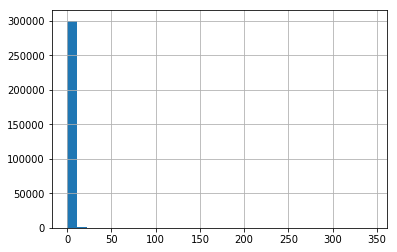

In [157]:
# Check the data distribution
processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist(bins=30)

In [158]:
# Data seems to be skewed
print("Skewness: {}".format(processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].skew()))

Skewness: 12.201071954709487


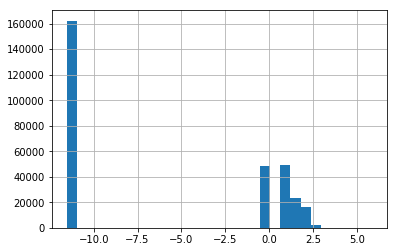

In [159]:
# Data skewed: try to apply log
processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].replace(0,0.00001).apply(np.log).hist(bins=30)

In [160]:
# Apply log
processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'] = processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].replace(0,0.00001)
processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'] = np.log(processed_app_train.OBS_60_CNT_SOCIAL_CIRCLE)

In [161]:
# Feature scaling (min-max normalization)
processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'] = ((processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'] -
                                      processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].min())/
                                     (processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].max() - 
                                      processed_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].min()))

### DEF_60_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings defaulted on 60 (days past due) DPD.

In [162]:
# Checking for missing values
print("Rows with missing values in DEF_60_CNT_SOCIAL_CIRCLE: {}".format(
    processed_app_train[processed_app_train.DEF_60_CNT_SOCIAL_CIRCLE.isnull()].shape[0]))

Rows with missing values in DEF_60_CNT_SOCIAL_CIRCLE: 0


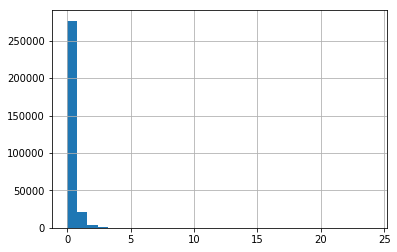

In [163]:
# Check the data distribution
processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].hist(bins=30)

In [164]:
# Data seems to be skewed
print("Skewness: {}".format(processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].skew()))

Skewness: 5.291578281898555


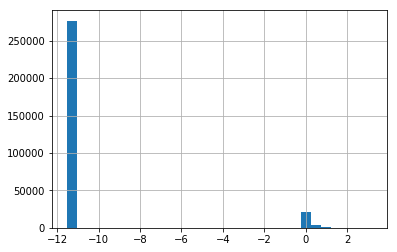

In [165]:
# Data skewed: try to apply log
processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].replace(0,0.00001).apply(np.log).hist(bins=30)

In [166]:
# Apply log
processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'] = processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].replace(0,0.00001)
processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'] = np.log(processed_app_train.DEF_60_CNT_SOCIAL_CIRCLE)

In [167]:
# Feature scaling (min-max normalization)
processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'] = ((processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'] -
                                      processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].min())/
                                     (processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].max() - 
                                      processed_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].min()))

### DAYS_LAST_PHONE_CHANGE
How many days before application did client change phone.

In [168]:
# Checking for missing values
print("Rows with missing values in DAYS_LAST_PHONE_CHANGE: {}".format(
    processed_app_train[processed_app_train.DAYS_LAST_PHONE_CHANGE.isnull()].shape[0]))

Rows with missing values in DAYS_LAST_PHONE_CHANGE: 0


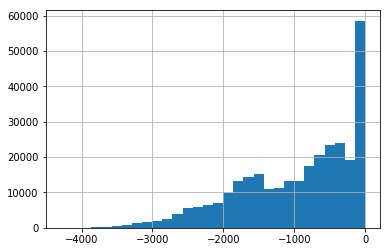

In [169]:
# Check the data distribution
processed_app_train['DAYS_LAST_PHONE_CHANGE'].hist(bins=30)

In [170]:
# Feature scaling (min-max normalization)
processed_app_train['DAYS_LAST_PHONE_CHANGE'] = ((processed_app_train['DAYS_LAST_PHONE_CHANGE'] -
                                      processed_app_train['DAYS_LAST_PHONE_CHANGE'].min())/
                                     (processed_app_train['DAYS_LAST_PHONE_CHANGE'].max() - 
                                      processed_app_train['DAYS_LAST_PHONE_CHANGE'].min()))

### FLAG_DOCUMENT_2
Did client provide document 2.

In [171]:
processed_app_train['FLAG_DOCUMENT_2'].describe()

count    302054.000000
mean          0.000043
std           0.006560
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_2, dtype: float64

There is no need to change the values od FLAG_DOCUMENT_2 to 21. Values between 0 and 1 with no missing values.

### AMT_REQ_CREDIT_BUREAU_HOUR
Number of enquiries to Credit Bureau about the client one hour before application.

In [172]:
# Checking for missing values
print("Rows with missing values in AMT_REQ_CREDIT_BUREAU_HOUR: {}".format(
    processed_app_train[processed_app_train.AMT_REQ_CREDIT_BUREAU_HOUR.isnull()].shape[0]))

Rows with missing values in AMT_REQ_CREDIT_BUREAU_HOUR: 40800


In [173]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    261254.000000
mean          0.006431
std           0.084041
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [174]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=processed_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].
                                                        mean(),inplace=True)

In [175]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'] = ((processed_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'] -
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].min())/
                                     (processed_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].max() - 
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].min()))

### AMT_REQ_CREDIT_BUREAU_DAY
Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).

In [176]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    261254.000000
mean          0.007051
std           0.111140
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [177]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=processed_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].
                                                        mean(),inplace=True)

In [178]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_REQ_CREDIT_BUREAU_DAY'] = ((processed_app_train['AMT_REQ_CREDIT_BUREAU_DAY'] -
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].min())/
                                     (processed_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].max() - 
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].min()))

### AMT_REQ_CREDIT_BUREAU_WEEK
Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application).

In [179]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    261254.000000
mean          0.034361
std           0.203871
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [180]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=processed_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].
                                                        mean(),inplace=True)

In [181]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'] = ((processed_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'] -
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].min())/
                                     (processed_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].max() - 
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].min()))

### AMT_REQ_CREDIT_BUREAU_MON
Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).

In [182]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    261254.000000
mean          0.267169
std           0.915371
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [183]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=processed_app_train['AMT_REQ_CREDIT_BUREAU_MON'].
                                                        mean(),inplace=True)

In [184]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_REQ_CREDIT_BUREAU_MON'] = ((processed_app_train['AMT_REQ_CREDIT_BUREAU_MON'] -
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_MON'].min())/
                                     (processed_app_train['AMT_REQ_CREDIT_BUREAU_MON'].max() - 
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_MON'].min()))

### AMT_REQ_CREDIT_BUREAU_QRT
Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).

In [185]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    261254.000000
mean          0.266511
std           0.797870
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [186]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=processed_app_train['AMT_REQ_CREDIT_BUREAU_QRT'].
                                                        mean(),inplace=True)

In [187]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_REQ_CREDIT_BUREAU_QRT'] = ((processed_app_train['AMT_REQ_CREDIT_BUREAU_QRT'] -
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_QRT'].min())/
                                     (processed_app_train['AMT_REQ_CREDIT_BUREAU_QRT'].max() - 
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_QRT'].min()))

### AMT_REQ_CREDIT_BUREAU_YEAR
Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).

In [188]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    261254.000000
mean          1.906669
std           1.872718
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [189]:
processed_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=processed_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].
                                                         mean(),inplace=True)

In [190]:
# Feature scaling (min-max normalization)
processed_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'] = ((processed_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'] -
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].min())/
                                     (processed_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].max() - 
                                      processed_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].min()))


For the remaining tables I will try to group and extract meaningful statistics consolidate it as new features of the training table.

## TABLE bureau_balance.csv

In [4]:
bureau_balance = pd.read_csv("data/bureau_balance.csv")
bureau_balance.shape

(27299925, 3)

## STATUS
Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] ).

In [192]:
bureau_balance['STATUS'] = bureau_balance['STATUS'].replace('X', np.NaN)
bureau_balance['STATUS'] = bureau_balance['STATUS'].replace('C', '0')
bureau_balance['STATUS'] = pd.to_numeric(bureau_balance['STATUS'])

In [193]:
agg_bureau_balance = bureau_balance.groupby('SK_ID_BUREAU').agg({'STATUS':['max','mean']})
agg_bureau_balance.columns = agg_bureau_balance.columns.map('_'.join).str.strip('_')
agg_bureau_balance.columns = map(str.upper, agg_bureau_balance.columns)
agg_bureau_balance.reset_index(inplace=True)
agg_bureau_balance.head()

,SK_ID_BUREAU,STATUS_MAX,STATUS_MEAN
0,5001709,0.0,0.0
1,5001710,0.0,0.0
2,5001711,0.0,0.0
3,5001712,0.0,0.0
4,5001713,NaN,NaN


In [194]:
# Feature scaling (min-max normalization)
agg_bureau_balance['STATUS_MAX'] = ((agg_bureau_balance['STATUS_MAX'] -
                                      agg_bureau_balance['STATUS_MAX'].min())/
                                     (agg_bureau_balance['STATUS_MAX'].max() - 
                                      agg_bureau_balance['STATUS_MAX'].min()))

agg_bureau_balance['STATUS_MEAN'] = ((agg_bureau_balance['STATUS_MEAN'] -
                                      agg_bureau_balance['STATUS_MEAN'].min())/
                                     (agg_bureau_balance['STATUS_MEAN'].max() - 
                                      agg_bureau_balance['STATUS_MEAN'].min()))

## TABLE bureau.csv

In [5]:
bureau = pd.read_csv("data/bureau.csv")
bureau.shape

(1716428, 17)

In [196]:
merged_bureau = pd.merge(bureau, agg_bureau_balance, how='left', on='SK_ID_BUREAU')

In [197]:
agg_bureau = merged_bureau.groupby('SK_ID_CURR').agg({'CREDIT_DAY_OVERDUE':['max', 'mean'],
                                                      'AMT_CREDIT_MAX_OVERDUE':['max'],
                                                      'CNT_CREDIT_PROLONG':['max'],
                                                      'AMT_CREDIT_SUM':['max','mean'],
                                                      'AMT_CREDIT_SUM_DEBT':['max','mean'],
                                                      'AMT_CREDIT_SUM_LIMIT':['max','mean'],
                                                      'AMT_CREDIT_SUM_OVERDUE':['max','mean'],
                                                      'AMT_ANNUITY':['max','mean'],
                                                      'STATUS_MAX':['max'],'STATUS_MEAN':['mean']})
agg_bureau.columns = agg_bureau.columns.map('_'.join).str.strip('_')
agg_bureau.columns = map(str.upper, agg_bureau.columns)
agg_bureau.reset_index(inplace=True)
agg_bureau.head()

,SK_ID_CURR,CREDIT_DAY_OVERDUE_MAX,CREDIT_DAY_OVERDUE_MEAN,AMT_CREDIT_MAX_OVERDUE_MAX,CNT_CREDIT_PROLONG_MAX,AMT_CREDIT_SUM_MAX,AMT_CREDIT_SUM_MEAN,AMT_CREDIT_SUM_DEBT_MAX,AMT_CREDIT_SUM_DEBT_MEAN,AMT_CREDIT_SUM_LIMIT_MAX,AMT_CREDIT_SUM_LIMIT_MEAN,AMT_CREDIT_SUM_OVERDUE_MAX,AMT_CREDIT_SUM_OVERDUE_MEAN,AMT_ANNUITY_MAX,AMT_ANNUITY_MEAN,STATUS_MAX_MAX,STATUS_MEAN_MEAN
0,100001,0,0.0,NaN,0,378000.0,207623.571429,373239.0,85240.928571,0.000,0.00000,0.0,0.0,10822.5,3545.357143,0.2,0.002198
1,100002,0,0.0,5043.645,0,450000.0,108131.945625,245781.0,49156.200000,31988.565,7997.14125,0.0,0.0,0.0,0.000000,0.2,0.059844
2,100003,0,0.0,0.000,0,810000.0,254350.125000,0.0,0.000000,810000.000,202500.00000,0.0,0.0,NaN,NaN,NaN,NaN
3,100004,0,0.0,0.000,0,94537.8,94518.900000,0.0,0.000000,0.000,0.00000,0.0,0.0,NaN,NaN,NaN,NaN
4,100005,0,0.0,0.000,0,568800.0,219042.000000,543087.0,189469.500000,0.000,0.00000,0.0,0.0,4261.5,1420.500000,0.0,0.000000


In [198]:
# Feature scaling (min-max normalization)
agg_bureau['CREDIT_DAY_OVERDUE_MAX'] = ((agg_bureau['CREDIT_DAY_OVERDUE_MAX'] - agg_bureau['CREDIT_DAY_OVERDUE_MAX'].min())/(agg_bureau['CREDIT_DAY_OVERDUE_MAX'].max() - agg_bureau['CREDIT_DAY_OVERDUE_MAX'].min()))
agg_bureau['CREDIT_DAY_OVERDUE_MEAN'] = ((agg_bureau['CREDIT_DAY_OVERDUE_MEAN'] - agg_bureau['CREDIT_DAY_OVERDUE_MEAN'].min())/(agg_bureau['CREDIT_DAY_OVERDUE_MEAN'].max() - agg_bureau['CREDIT_DAY_OVERDUE_MEAN'].min()))
agg_bureau['AMT_CREDIT_MAX_OVERDUE_MAX'] = ((agg_bureau['AMT_CREDIT_MAX_OVERDUE_MAX'] - agg_bureau['AMT_CREDIT_MAX_OVERDUE_MAX'].min())/(agg_bureau['AMT_CREDIT_MAX_OVERDUE_MAX'].max() - agg_bureau['AMT_CREDIT_MAX_OVERDUE_MAX'].min()))
agg_bureau['CNT_CREDIT_PROLONG_MAX'] = ((agg_bureau['CNT_CREDIT_PROLONG_MAX'] - agg_bureau['CNT_CREDIT_PROLONG_MAX'].min())/(agg_bureau['CNT_CREDIT_PROLONG_MAX'].max() - agg_bureau['CNT_CREDIT_PROLONG_MAX'].min()))
agg_bureau['AMT_CREDIT_SUM_MAX'] = ((agg_bureau['AMT_CREDIT_SUM_MAX'] - agg_bureau['AMT_CREDIT_SUM_MAX'].min())/(agg_bureau['AMT_CREDIT_SUM_MAX'].max() - agg_bureau['AMT_CREDIT_SUM_MAX'].min()))
agg_bureau['AMT_CREDIT_SUM_MEAN'] = ((agg_bureau['AMT_CREDIT_SUM_MEAN'] - agg_bureau['AMT_CREDIT_SUM_MEAN'].min())/(agg_bureau['AMT_CREDIT_SUM_MEAN'].max() - agg_bureau['AMT_CREDIT_SUM_MEAN'].min()))
agg_bureau['AMT_CREDIT_SUM_DEBT_MAX'] = ((agg_bureau['AMT_CREDIT_SUM_DEBT_MAX'] - agg_bureau['AMT_CREDIT_SUM_DEBT_MAX'].min())/(agg_bureau['AMT_CREDIT_SUM_DEBT_MAX'].max() - agg_bureau['AMT_CREDIT_SUM_DEBT_MAX'].min()))
agg_bureau['AMT_CREDIT_SUM_DEBT_MEAN'] = ((agg_bureau['AMT_CREDIT_SUM_DEBT_MEAN'] - agg_bureau['AMT_CREDIT_SUM_DEBT_MEAN'].min())/(agg_bureau['AMT_CREDIT_SUM_DEBT_MEAN'].max() - agg_bureau['AMT_CREDIT_SUM_DEBT_MEAN'].min()))
agg_bureau['AMT_CREDIT_SUM_LIMIT_MAX'] = ((agg_bureau['AMT_CREDIT_SUM_LIMIT_MAX'] - agg_bureau['AMT_CREDIT_SUM_LIMIT_MAX'].min())/(agg_bureau['AMT_CREDIT_SUM_LIMIT_MAX'].max() - agg_bureau['AMT_CREDIT_SUM_LIMIT_MAX'].min()))
agg_bureau['AMT_CREDIT_SUM_LIMIT_MEAN'] = ((agg_bureau['AMT_CREDIT_SUM_LIMIT_MEAN'] - agg_bureau['AMT_CREDIT_SUM_LIMIT_MEAN'].min())/(agg_bureau['AMT_CREDIT_SUM_LIMIT_MEAN'].max() - agg_bureau['AMT_CREDIT_SUM_LIMIT_MEAN'].min()))
agg_bureau['AMT_CREDIT_SUM_OVERDUE_MAX'] = ((agg_bureau['AMT_CREDIT_SUM_OVERDUE_MAX'] - agg_bureau['AMT_CREDIT_SUM_OVERDUE_MAX'].min())/(agg_bureau['AMT_CREDIT_SUM_OVERDUE_MAX'].max() - agg_bureau['AMT_CREDIT_SUM_OVERDUE_MAX'].min()))
agg_bureau['AMT_CREDIT_SUM_OVERDUE_MEAN'] = ((agg_bureau['AMT_CREDIT_SUM_OVERDUE_MEAN'] - agg_bureau['AMT_CREDIT_SUM_OVERDUE_MEAN'].min())/(agg_bureau['AMT_CREDIT_SUM_OVERDUE_MEAN'].max() - agg_bureau['AMT_CREDIT_SUM_OVERDUE_MEAN'].min()))
agg_bureau['AMT_ANNUITY_MAX'] = ((agg_bureau['AMT_ANNUITY_MAX'] - agg_bureau['AMT_ANNUITY_MAX'].min())/(agg_bureau['AMT_ANNUITY_MAX'].max() - agg_bureau['AMT_ANNUITY_MAX'].min()))
agg_bureau['AMT_ANNUITY_MEAN'] = ((agg_bureau['AMT_ANNUITY_MEAN'] - agg_bureau['AMT_ANNUITY_MEAN'].min())/(agg_bureau['AMT_ANNUITY_MEAN'].max() - agg_bureau['AMT_ANNUITY_MEAN'].min()))
agg_bureau['STATUS_MAX_MAX'] = ((agg_bureau['STATUS_MAX_MAX'] - agg_bureau['STATUS_MAX_MAX'].min())/(agg_bureau['STATUS_MAX_MAX'].max() - agg_bureau['STATUS_MAX_MAX'].min()))
agg_bureau['STATUS_MEAN_MEAN'] = ((agg_bureau['STATUS_MEAN_MEAN'] - agg_bureau['STATUS_MEAN_MEAN'].min())/(agg_bureau['STATUS_MEAN_MEAN'].max() - agg_bureau['STATUS_MEAN_MEAN'].min()))


In [199]:
merged_processed_app_train = pd.merge(processed_app_train, agg_bureau, how='left', on='SK_ID_CURR')

In [200]:
merged_processed_app_train.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,AMT_CREDIT_SUM_DEBT_MAX,AMT_CREDIT_SUM_DEBT_MEAN,AMT_CREDIT_SUM_LIMIT_MAX,AMT_CREDIT_SUM_LIMIT_MEAN,AMT_CREDIT_SUM_OVERDUE_MAX,AMT_CREDIT_SUM_OVERDUE_MEAN,AMT_ANNUITY_MAX,AMT_ANNUITY_MEAN,STATUS_MAX_MAX,STATUS_MEAN_MEAN
0,100002,1,0,1,0.0,0.245235,0.489168,0.537543,0.468926,0.256321,...,0.001597,0.02144,0.007167,0.023030,0.0,0.0,0.0,0.0,0.2,0.059844
1,100003,0,0,0,0.0,0.279379,0.746353,0.610134,0.722716,0.045016,...,0.000153,0.02051,0.172443,0.065332,0.0,0.0,NaN,NaN,NaN,NaN
2,100004,0,1,1,0.0,0.114842,0.244146,0.281841,0.261439,0.134897,...,0.000153,0.02051,0.000371,0.021291,0.0,0.0,NaN,NaN,NaN,NaN
3,100006,0,0,1,0.0,0.197110,0.430802,0.573785,0.432651,0.107023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0.0,0.184605,0.540826,0.513513,0.551331,0.392880,...,0.000153,0.02051,0.000371,0.021291,0.0,0.0,NaN,NaN,NaN,NaN


## TABLE POS_CASH_balance.csv

In [9]:
pos_cash = pd.read_csv("data/POS_CASH_balance.csv")
pos_cash.shape

(10001358, 8)

In [202]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [203]:
agg_pos_cash = pos_cash.groupby('SK_ID_CURR').agg({'CNT_INSTALMENT':['max', 'mean'],
                                                      'CNT_INSTALMENT_FUTURE':['max', 'mean'],
                                                      'SK_DPD':['max', 'mean'],
                                                      'SK_DPD_DEF':['max', 'mean']})
agg_pos_cash.columns = agg_pos_cash.columns.map('_'.join).str.strip('_')
agg_pos_cash.columns = map(str.upper, agg_pos_cash.columns)
agg_pos_cash.reset_index(inplace=True)
agg_pos_cash.head()

,SK_ID_CURR,CNT_INSTALMENT_MAX,CNT_INSTALMENT_MEAN,CNT_INSTALMENT_FUTURE_MAX,CNT_INSTALMENT_FUTURE_MEAN,SK_DPD_MAX,SK_DPD_MEAN,SK_DPD_DEF_MAX,SK_DPD_DEF_MEAN
0,100001,4.0,4.000000,4.0,1.444444,7,0.777778,7,0.777778
1,100002,24.0,24.000000,24.0,15.000000,0,0.000000,0,0.000000
2,100003,12.0,10.107143,12.0,5.785714,0,0.000000,0,0.000000
3,100004,4.0,3.750000,4.0,2.250000,0,0.000000,0,0.000000
4,100005,12.0,11.700000,12.0,7.200000,0,0.000000,0,0.000000


In [204]:
# Feature scaling (min-max normalization)
agg_pos_cash['CNT_INSTALMENT_MAX'] = ((agg_pos_cash['CNT_INSTALMENT_MAX'] - agg_pos_cash['CNT_INSTALMENT_MAX'].min())/(agg_pos_cash['CNT_INSTALMENT_MAX'].max() - agg_pos_cash['CNT_INSTALMENT_MAX'].min()))
agg_pos_cash['CNT_INSTALMENT_MEAN'] = ((agg_pos_cash['CNT_INSTALMENT_MEAN'] - agg_pos_cash['CNT_INSTALMENT_MEAN'].min())/(agg_pos_cash['CNT_INSTALMENT_MEAN'].max() - agg_pos_cash['CNT_INSTALMENT_MEAN'].min()))
agg_pos_cash['CNT_INSTALMENT_FUTURE_MAX'] = ((agg_pos_cash['CNT_INSTALMENT_FUTURE_MAX'] - agg_pos_cash['CNT_INSTALMENT_FUTURE_MAX'].min())/(agg_pos_cash['CNT_INSTALMENT_FUTURE_MAX'].max() - agg_pos_cash['CNT_INSTALMENT_FUTURE_MAX'].min()))
agg_pos_cash['CNT_INSTALMENT_FUTURE_MEAN'] = ((agg_pos_cash['CNT_INSTALMENT_FUTURE_MEAN'] - agg_pos_cash['CNT_INSTALMENT_FUTURE_MEAN'].min())/(agg_pos_cash['CNT_INSTALMENT_FUTURE_MEAN'].max() - agg_pos_cash['CNT_INSTALMENT_FUTURE_MEAN'].min()))
agg_pos_cash['SK_DPD_MAX'] = ((agg_pos_cash['SK_DPD_MAX'] - agg_pos_cash['SK_DPD_MAX'].min())/(agg_pos_cash['SK_DPD_MAX'].max() - agg_pos_cash['SK_DPD_MAX'].min()))
agg_pos_cash['SK_DPD_MEAN'] = ((agg_pos_cash['SK_DPD_MEAN'] - agg_pos_cash['SK_DPD_MEAN'].min())/(agg_pos_cash['SK_DPD_MEAN'].max() - agg_pos_cash['SK_DPD_MEAN'].min()))
agg_pos_cash['SK_DPD_DEF_MAX'] = ((agg_pos_cash['SK_DPD_DEF_MAX'] - agg_pos_cash['SK_DPD_DEF_MAX'].min())/(agg_pos_cash['SK_DPD_DEF_MAX'].max() - agg_pos_cash['SK_DPD_DEF_MAX'].min()))
agg_pos_cash['SK_DPD_DEF_MEAN'] = ((agg_pos_cash['SK_DPD_DEF_MEAN'] - agg_pos_cash['SK_DPD_DEF_MEAN'].min())/(agg_pos_cash['SK_DPD_DEF_MEAN'].max() - agg_pos_cash['SK_DPD_DEF_MEAN'].min()))

In [205]:
merged_processed_app_train = pd.merge(merged_processed_app_train, agg_pos_cash, how='left', on='SK_ID_CURR')

## TABLE credit_card_balance.csv

In [8]:
credit_card = pd.read_csv("data/credit_card_balance.csv")
credit_card.shape

(3840312, 23)

In [207]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [208]:
agg_credit_card = credit_card.groupby('SK_ID_CURR').agg({'AMT_BALANCE':['max', 'mean'],
                                                     'AMT_CREDIT_LIMIT_ACTUAL':['max', 'mean'],
                                                     'CNT_DRAWINGS_ATM_CURRENT':['max', 'mean'],
                                                     'CNT_INSTALMENT_MATURE_CUM':['max', 'mean'],
                                                     'SK_DPD':['max', 'mean'],
                                                     'SK_DPD_DEF':['max', 'mean']})
agg_credit_card.columns = agg_credit_card.columns.map('_'.join).str.strip('_')
agg_credit_card.columns = map(str.upper, agg_credit_card.columns)
agg_credit_card.reset_index(inplace=True)
agg_credit_card.head()

,SK_ID_CURR,AMT_BALANCE_MAX,AMT_BALANCE_MEAN,AMT_CREDIT_LIMIT_ACTUAL_MAX,AMT_CREDIT_LIMIT_ACTUAL_MEAN,CNT_DRAWINGS_ATM_CURRENT_MAX,CNT_DRAWINGS_ATM_CURRENT_MEAN,CNT_INSTALMENT_MATURE_CUM_MAX,CNT_INSTALMENT_MATURE_CUM_MEAN,SK_DPD_MAX,SK_DPD_MEAN,SK_DPD_DEF_MAX,SK_DPD_DEF_MEAN
0,100006,0.00,0.000000,270000,270000.000000,NaN,NaN,0.0,0.000000,0,0.000000,0,0.000000
1,100011,189000.00,54482.111149,180000,164189.189189,4.0,0.054054,33.0,25.767123,0,0.000000,0,0.000000
2,100013,161420.22,18159.919219,157500,131718.750000,7.0,0.255556,22.0,18.719101,1,0.010417,1,0.010417
3,100021,0.00,0.000000,675000,675000.000000,NaN,NaN,0.0,0.000000,0,0.000000,0,0.000000
4,100023,0.00,0.000000,225000,135000.000000,NaN,NaN,0.0,0.000000,0,0.000000,0,0.000000


In [209]:
# Feature scaling (min-max normalization)
agg_credit_card['AMT_BALANCE_MAX'] = ((agg_credit_card['AMT_BALANCE_MAX'] - agg_credit_card['AMT_BALANCE_MAX'].min())/(agg_credit_card['AMT_BALANCE_MAX'].max() - agg_credit_card['AMT_BALANCE_MAX'].min()))
agg_credit_card['AMT_BALANCE_MEAN'] = ((agg_credit_card['AMT_BALANCE_MEAN'] - agg_credit_card['AMT_BALANCE_MEAN'].min())/(agg_credit_card['AMT_BALANCE_MEAN'].max() - agg_credit_card['AMT_BALANCE_MEAN'].min()))
agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MAX'] = ((agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MAX'] - agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MAX'].min())/(agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MAX'].max() - agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MAX'].min()))
agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MEAN'] = ((agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MEAN'] - agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MEAN'].min())/(agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MEAN'].max() - agg_credit_card['AMT_CREDIT_LIMIT_ACTUAL_MEAN'].min()))
agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MAX'] = ((agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MAX'] - agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MAX'].min())/(agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MAX'].max() - agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MAX'].min()))
agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MEAN'] = ((agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MEAN'] - agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MEAN'].min())/(agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MEAN'].max() - agg_credit_card['CNT_DRAWINGS_ATM_CURRENT_MEAN'].min()))
agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MAX'] = ((agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MAX'] - agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MAX'].min())/(agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MAX'].max() - agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MAX'].min()))
agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MEAN'] = ((agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MEAN'] - agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MEAN'].min())/(agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MEAN'].max() - agg_credit_card['CNT_INSTALMENT_MATURE_CUM_MEAN'].min()))
agg_credit_card['SK_DPD_MAX'] = ((agg_credit_card['SK_DPD_MAX'] - agg_credit_card['SK_DPD_MAX'].min())/(agg_credit_card['SK_DPD_MAX'].max() - agg_credit_card['SK_DPD_MAX'].min()))
agg_credit_card['SK_DPD_MEAN'] = ((agg_credit_card['SK_DPD_MEAN'] - agg_credit_card['SK_DPD_MEAN'].min())/(agg_credit_card['SK_DPD_MEAN'].max() - agg_credit_card['SK_DPD_MEAN'].min()))
agg_credit_card['SK_DPD_DEF_MAX'] = ((agg_credit_card['SK_DPD_DEF_MAX'] - agg_credit_card['SK_DPD_DEF_MAX'].min())/(agg_credit_card['SK_DPD_DEF_MAX'].max() - agg_credit_card['SK_DPD_DEF_MAX'].min()))
agg_credit_card['SK_DPD_DEF_MEAN'] = ((agg_credit_card['SK_DPD_DEF_MEAN'] - agg_credit_card['SK_DPD_DEF_MEAN'].min())/(agg_credit_card['SK_DPD_DEF_MEAN'].max() - agg_credit_card['SK_DPD_DEF_MEAN'].min()))

In [210]:
merged_processed_app_train = pd.merge(merged_processed_app_train, agg_credit_card, how='left', on='SK_ID_CURR')

## TABLE previous_application.csv

In [7]:
previous_application = pd.read_csv("data/previous_application.csv")
previous_application.shape

(1670214, 37)

In [212]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
agg_previous_app = previous_application.groupby('SK_ID_CURR').agg({'AMT_ANNUITY':['max', 'mean'],
                                                     'AMT_APPLICATION':['max', 'mean'],
                                                     'AMT_DOWN_PAYMENT':['max', 'mean'],
                                                     'RATE_INTEREST_PRIMARY':['max', 'mean'],
                                                     'RATE_INTEREST_PRIVILEGED':['max', 'mean']})
agg_previous_app.columns = agg_previous_app.columns.map('_'.join).str.strip('_')
agg_previous_app.columns = map(str.upper, agg_previous_app.columns)
agg_previous_app.reset_index(inplace=True)
agg_previous_app.head()

,SK_ID_CURR,AMT_ANNUITY_MAX,AMT_ANNUITY_MEAN,AMT_APPLICATION_MAX,AMT_APPLICATION_MEAN,AMT_DOWN_PAYMENT_MAX,AMT_DOWN_PAYMENT_MEAN,RATE_INTEREST_PRIMARY_MAX,RATE_INTEREST_PRIMARY_MEAN,RATE_INTEREST_PRIVILEGED_MAX,RATE_INTEREST_PRIVILEGED_MEAN
0,100001,3951.000,3951.000,24835.5,24835.50,2520.0,2520.0,NaN,NaN,NaN,NaN
1,100002,9251.775,9251.775,179055.0,179055.00,0.0,0.0,NaN,NaN,NaN,NaN
2,100003,98356.995,56553.990,900000.0,435436.50,6885.0,3442.5,NaN,NaN,NaN,NaN
3,100004,5357.250,5357.250,24282.0,24282.00,4860.0,4860.0,NaN,NaN,NaN,NaN
4,100005,4813.200,4813.200,44617.5,22308.75,4464.0,4464.0,NaN,NaN,NaN,NaN


In [214]:
# Feature scaling (min-max normalization)
agg_previous_app['AMT_ANNUITY_MAX'] = ((agg_previous_app['AMT_ANNUITY_MAX'] - agg_previous_app['AMT_ANNUITY_MAX'].min())/(agg_previous_app['AMT_ANNUITY_MAX'].max() - agg_previous_app['AMT_ANNUITY_MAX'].min()))
agg_previous_app['AMT_ANNUITY_MEAN'] = ((agg_previous_app['AMT_ANNUITY_MEAN'] - agg_previous_app['AMT_ANNUITY_MEAN'].min())/(agg_previous_app['AMT_ANNUITY_MEAN'].max() - agg_previous_app['AMT_ANNUITY_MEAN'].min()))
agg_previous_app['AMT_APPLICATION_MAX'] = ((agg_previous_app['AMT_APPLICATION_MAX'] - agg_previous_app['AMT_APPLICATION_MAX'].min())/(agg_previous_app['AMT_APPLICATION_MAX'].max() - agg_previous_app['AMT_APPLICATION_MAX'].min()))
agg_previous_app['AMT_APPLICATION_MEAN'] = ((agg_previous_app['AMT_APPLICATION_MEAN'] - agg_previous_app['AMT_APPLICATION_MEAN'].min())/(agg_previous_app['AMT_APPLICATION_MEAN'].max() - agg_previous_app['AMT_APPLICATION_MEAN'].min()))
agg_previous_app['AMT_DOWN_PAYMENT_MAX'] = ((agg_previous_app['AMT_DOWN_PAYMENT_MAX'] - agg_previous_app['AMT_DOWN_PAYMENT_MAX'].min())/(agg_previous_app['AMT_DOWN_PAYMENT_MAX'].max() - agg_previous_app['AMT_DOWN_PAYMENT_MAX'].min()))
agg_previous_app['AMT_DOWN_PAYMENT_MEAN'] = ((agg_previous_app['AMT_DOWN_PAYMENT_MEAN'] - agg_previous_app['AMT_DOWN_PAYMENT_MEAN'].min())/(agg_previous_app['AMT_DOWN_PAYMENT_MEAN'].max() - agg_previous_app['AMT_DOWN_PAYMENT_MEAN'].min()))
agg_previous_app['RATE_INTEREST_PRIMARY_MAX'] = ((agg_previous_app['RATE_INTEREST_PRIMARY_MAX'] - agg_previous_app['RATE_INTEREST_PRIMARY_MAX'].min())/(agg_previous_app['RATE_INTEREST_PRIMARY_MAX'].max() - agg_previous_app['RATE_INTEREST_PRIMARY_MAX'].min()))
agg_previous_app['RATE_INTEREST_PRIMARY_MEAN'] = ((agg_previous_app['RATE_INTEREST_PRIMARY_MEAN'] - agg_previous_app['RATE_INTEREST_PRIMARY_MEAN'].min())/(agg_previous_app['RATE_INTEREST_PRIMARY_MEAN'].max() - agg_previous_app['RATE_INTEREST_PRIMARY_MEAN'].min()))
agg_previous_app['RATE_INTEREST_PRIVILEGED_MAX'] = ((agg_previous_app['RATE_INTEREST_PRIVILEGED_MAX'] - agg_previous_app['RATE_INTEREST_PRIVILEGED_MAX'].min())/(agg_previous_app['RATE_INTEREST_PRIVILEGED_MAX'].max() - agg_previous_app['RATE_INTEREST_PRIVILEGED_MAX'].min()))
agg_previous_app['RATE_INTEREST_PRIVILEGED_MEAN'] = ((agg_previous_app['RATE_INTEREST_PRIVILEGED_MEAN'] - agg_previous_app['RATE_INTEREST_PRIVILEGED_MEAN'].min())/(agg_previous_app['RATE_INTEREST_PRIVILEGED_MEAN'].max() - agg_previous_app['RATE_INTEREST_PRIVILEGED_MEAN'].min()))

In [215]:
merged_processed_app_train = pd.merge(merged_processed_app_train, agg_previous_app, how='left', on='SK_ID_CURR')

In [216]:
# get approved apps count
approved_previous_app = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved'].groupby('SK_ID_CURR').size().reset_index(name='APPROVED_COUNT')
approved_previous_app['APPROVED_COUNT'] = ((approved_previous_app['APPROVED_COUNT'] - approved_previous_app['APPROVED_COUNT'].min())/(approved_previous_app['APPROVED_COUNT'].max() - approved_previous_app['APPROVED_COUNT'].min()))
merged_processed_app_train = pd.merge(merged_processed_app_train, approved_previous_app, how='left', on='SK_ID_CURR')

# get refused apps count
refused_previous_app = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused'].groupby('SK_ID_CURR').size().reset_index(name='REFUSED_COUNT')
refused_previous_app['REFUSED_COUNT'] = ((refused_previous_app['REFUSED_COUNT'] - refused_previous_app['REFUSED_COUNT'].min())/(refused_previous_app['REFUSED_COUNT'].max() - refused_previous_app['REFUSED_COUNT'].min()))
merged_processed_app_train = pd.merge(merged_processed_app_train, refused_previous_app, how='left', on='SK_ID_CURR')

# include approved count minus refused count
merged_processed_app_train['DIFF_APPROVED_REFUSED'] = merged_processed_app_train['APPROVED_COUNT'] - merged_processed_app_train['REFUSED_COUNT']


In [217]:
previous_application['RATE_INTEREST_PRIMARY'].describe()

count    5951.000000
mean        0.188357
std         0.087671
min         0.034781
25%         0.160716
50%         0.189122
75%         0.193330
max         1.000000
Name: RATE_INTEREST_PRIMARY, dtype: float64

## TABLE installments_payments.csv

In [10]:
installments_payments = pd.read_csv("data/installments_payments.csv")
installments_payments.shape

(13605401, 8)

In [219]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [220]:
installments_payments['DIFF_INST_PAYMENT'] = (installments_payments['AMT_INSTALMENT'] - 
                                              installments_payments['AMT_PAYMENT'])
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DIFF_INST_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,0.000
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.000
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,0.000
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,4.455


In [221]:
agg_installments_payments = installments_payments.groupby('SK_ID_CURR').agg({'AMT_INSTALMENT':['max', 'mean'],
                                                                   'AMT_PAYMENT':['max', 'mean'],
                                                                   'DIFF_INST_PAYMENT':['max', 'mean']})
agg_installments_payments.columns = agg_installments_payments.columns.map('_'.join).str.strip('_')
agg_installments_payments.columns = map(str.upper, agg_installments_payments.columns)
agg_installments_payments.reset_index(inplace=True)
agg_installments_payments.head()

,SK_ID_CURR,AMT_INSTALMENT_MAX,AMT_INSTALMENT_MEAN,AMT_PAYMENT_MAX,AMT_PAYMENT_MEAN,DIFF_INST_PAYMENT_MAX,DIFF_INST_PAYMENT_MEAN
0,100001,17397.900,5885.132143,17397.900,5885.132143,0.0,0.0
1,100002,53093.745,11559.247105,53093.745,11559.247105,0.0,0.0
2,100003,560835.360,64754.586000,560835.360,64754.586000,0.0,0.0
3,100004,10573.965,7096.155000,10573.965,7096.155000,0.0,0.0
4,100005,17656.245,6240.205000,17656.245,6240.205000,0.0,0.0


In [222]:
# Feature scaling (min-max normalization)
agg_installments_payments['AMT_INSTALMENT_MAX'] = ((agg_installments_payments['AMT_INSTALMENT_MAX'] - agg_installments_payments['AMT_INSTALMENT_MAX'].min())/(agg_installments_payments['AMT_INSTALMENT_MAX'].max() - agg_installments_payments['AMT_INSTALMENT_MAX'].min()))
agg_installments_payments['AMT_INSTALMENT_MEAN'] = ((agg_installments_payments['AMT_INSTALMENT_MEAN'] - agg_installments_payments['AMT_INSTALMENT_MEAN'].min())/(agg_installments_payments['AMT_INSTALMENT_MEAN'].max() - agg_installments_payments['AMT_INSTALMENT_MEAN'].min()))
agg_installments_payments['AMT_PAYMENT_MAX'] = ((agg_installments_payments['AMT_PAYMENT_MAX'] - agg_installments_payments['AMT_PAYMENT_MAX'].min())/(agg_installments_payments['AMT_PAYMENT_MAX'].max() - agg_installments_payments['AMT_PAYMENT_MAX'].min()))
agg_installments_payments['AMT_PAYMENT_MEAN'] = ((agg_installments_payments['AMT_PAYMENT_MEAN'] - agg_installments_payments['AMT_PAYMENT_MEAN'].min())/(agg_installments_payments['AMT_PAYMENT_MEAN'].max() - agg_installments_payments['AMT_PAYMENT_MEAN'].min()))
agg_installments_payments['DIFF_INST_PAYMENT_MAX'] = ((agg_installments_payments['DIFF_INST_PAYMENT_MAX'] - agg_installments_payments['DIFF_INST_PAYMENT_MAX'].min())/(agg_installments_payments['DIFF_INST_PAYMENT_MAX'].max() - agg_installments_payments['DIFF_INST_PAYMENT_MAX'].min()))
agg_installments_payments['DIFF_INST_PAYMENT_MEAN'] = ((agg_installments_payments['DIFF_INST_PAYMENT_MEAN'] - agg_installments_payments['DIFF_INST_PAYMENT_MAX'].min())/(agg_installments_payments['DIFF_INST_PAYMENT_MEAN'].max() - agg_installments_payments['DIFF_INST_PAYMENT_MEAN'].min()))

In [223]:
merged_processed_app_train = pd.merge(merged_processed_app_train, agg_installments_payments, how='left', on='SK_ID_CURR')

## Debt to Income Ratio
<p>Here I will calculate, using only the Credit Bureau information, an approximated debt to income ratio, that relates but not corresponds to the debt-to-income ratio (DTI) used in the mortgage industry.</p>
<p> The total active debts divided by the applicant's income can be good estimator of his capacity to pay his debts.

In [224]:
active_bureau = bureau[bureau['CREDIT_ACTIVE'] == 'Active']
agg_active_bureau = active_bureau.groupby('SK_ID_CURR').agg({'AMT_CREDIT_SUM_DEBT':['sum']})
agg_active_bureau.columns = agg_active_bureau.columns.map('_'.join).str.strip('_')
agg_active_bureau.columns = map(str.upper, agg_active_bureau.columns)
agg_active_bureau.reset_index(inplace=True)
agg_active_bureau.rename(columns={'AMT_CREDIT_SUM_DEBT_SUM':'TOTAL_ACTIVE_DEBT'}, 
                 inplace=True)

In [225]:
agg_active_bureau.head()

,SK_ID_CURR,TOTAL_ACTIVE_DEBT
0,100001,596686.5
1,100002,245781.0
2,100003,0.0
3,100005,568408.5
4,100008,240057.0


In [226]:
merged_processed_app_train = pd.merge(merged_processed_app_train, agg_active_bureau, how='left', on='SK_ID_CURR')

merged_processed_app_train['TOTAL_ACTIVE_DEBT'].fillna(value=0.,inplace=True)

merged_processed_app_train['DEBIT_TO_INCOME'] = (merged_processed_app_train['TOTAL_ACTIVE_DEBT'] / 
                                                 merged_processed_app_train['AMT_INCOME_TOTAL'])
merged_processed_app_train = merged_processed_app_train.drop('TOTAL_ACTIVE_DEBT', axis=1)

# Feature scaling (min-max normalization)
merged_processed_app_train['DEBIT_TO_INCOME'] = ((merged_processed_app_train['DEBIT_TO_INCOME'] -
                                                  merged_processed_app_train['DEBIT_TO_INCOME'].min())/
                                                 (merged_processed_app_train['DEBIT_TO_INCOME'].max() - 
                                                  merged_processed_app_train['DEBIT_TO_INCOME'].min()))

In [227]:
# The remaining missing values will be replaced by the mean for each column
merged_processed_app_train.fillna(value=merged_processed_app_train.mean(), inplace=True)
merged_processed_app_train = merged_processed_app_train.drop('SK_ID_CURR', axis=1)

In [228]:
merged_processed_app_train.to_pickle('data/processed_data')

In [229]:
print()
print("Number of features: \t{:,}".format(len(merged_processed_app_train.columns)))
print("Number of samples: \t{:,}".format(merged_processed_app_train.shape[0]))


Number of features: 	308
Number of samples: 	302,054
